In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
reactions_data = pd.read_csv('Reactions.csv',index_col=0)
reactions_data.head()

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [58]:
reactions_data.shape

(25553, 4)

In [59]:
reactions_data.isnull().sum()

Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [60]:
reactions_data.isnull().mean()

Content ID    0.000000
User ID       0.118147
Type          0.038352
Datetime      0.000000
dtype: float64

In [61]:
reactions_data[reactions_data['Type'].isnull()]

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
46,9f737e0a-3cdd-4d29-9d24-753f4e3be810,NaN,NaN,2020-12-04 20:00:31
62,230c4e4d-70c3-461d-b42c-ec09396efb3f,NaN,NaN,2021-03-19 08:19:38
94,356fff80-da4d-4785-9f43-bc1261031dc6,NaN,NaN,2020-08-28 23:43:55
102,01ab84dd-6364-4236-abbb-3f237db77180,NaN,NaN,2021-02-08 21:55:56
...,...,...,...,...
25445,b4cef9ef-627b-41d7-a051-5961b0204ebb,NaN,NaN,2020-11-30 15:26:32
25449,7a79f4e4-3b7d-44dc-bdef-bc990740252c,NaN,NaN,2021-04-04 19:39:36
25454,435007a5-6261-4d8b-b0a4-55fdc189754b,NaN,NaN,2021-01-04 20:28:29
25499,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,NaN,NaN,2021-05-25 18:05:31


In [62]:
reactions_data = reactions_data.dropna(axis=0)

In [63]:
reactions_data.shape

(22534, 4)

In [64]:
reactions_data = reactions_data.drop(['User ID'],axis=1)

In [65]:
reactions_data['Datetime'] = pd.to_datetime(reactions_data['Datetime'])

In [66]:
reactions_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22534 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Content ID  22534 non-null  object        
 1   Type        22534 non-null  object        
 2   Datetime    22534 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 704.2+ KB


In [67]:
reactions_data.rename(columns={'Type':'Reaction_type'},inplace=True)

In [68]:
reactions_data.to_csv('clean_reactions.csv')

In [69]:
content_data = pd.read_csv('Content.csv',index_col=0)
content_data.head()

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [70]:
content_data.isnull().sum()

Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [71]:
content_data.shape

(1000, 5)

In [72]:
content_data = content_data.drop(['URL','User ID'],axis=1)

In [73]:
content_data.head()

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [74]:
content_data.rename(columns={'Type':'Content_type'},inplace=True)

In [75]:
content_data.head()

,Content ID,Content_type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [76]:
content_data.to_csv('clean_content.csv')

In [77]:
clean_reaction_data = pd.read_csv('clean_reactions.csv',index_col=0)

In [78]:
clean_reaction_data.head()

,Content ID,Reaction_type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [79]:
clean_content_data = pd.read_csv('clean_content.csv',index_col=0)

In [80]:
clean_content_data.head()

,Content ID,Content_type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [81]:
df =  clean_reaction_data.merge(clean_content_data,on='Content ID')

In [82]:
df.head()

,Content ID,Reaction_type,Datetime,Content_type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying


In [83]:
df.shape

(22534, 5)

In [84]:
reaction_type_data = pd.read_csv('ReactionTypes.csv',index_col=0)

In [85]:
reaction_type_data.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [86]:
reaction_type_data.rename(columns={'Type':'Reaction_type'},inplace=True)

In [87]:
final_df = df.merge(reaction_type_data,on='Reaction_type')

In [88]:
final_df.head()

,Content ID,Reaction_type,Datetime,Content_type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,Studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0


In [89]:
final_df.to_csv('final_data_file.csv')

In [90]:
final_df.groupby('Category')['Score'].sum()

Category
"animals"             1519
"cooking"              644
"culture"             1980
"dogs"                1618
"food"                  50
"public speaking"      894
"science"              506
"soccer"              2243
"studying"             486
"technology"           939
"veganism"            1040
Animals               3561
Culture               1450
Education             1218
Fitness               5017
Food                  3142
Healthy Eating         272
Public Speaking       1231
Science               4324
Soccer                2516
Studying              1176
Technology             217
Travel                1010
Veganism               579
animals              63544
cooking              58530
culture              57233
dogs                 46780
education            51541
fitness              45818
food                 58406
healthy eating       62866
public speaking      43626
science              60575
soccer               48457
studying             47780
technology         

In [91]:
final_data = pd.read_csv('Final_Data_set.csv',index_col=0)

In [92]:
final_data.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,7/11/20 9:43,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/6/21 12:22,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/4/21 5:13,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,6/1/21 19:13,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/8/20 12:25,photo,studying,positive,30


In [93]:
final_data['Datetime'] = pd.to_datetime(final_data['Datetime'])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     24573 non-null  object        
 1   Reaction Type  24573 non-null  object        
 2   Datetime       24573 non-null  datetime64[ns]
 3   Content Type   24573 non-null  object        
 4   Category       24573 non-null  object        
 5   Sentiment      24573 non-null  object        
 6   Score          24573 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.5+ MB


In [94]:
import datetime as dt
final_data['Months'] = final_data['Datetime'].dt.month
final_data['years'] = final_data['Datetime'].dt.year

In [95]:
final_data.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score,Months,years
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-07-11 09:43:00,photo,studying,negative,0,7,2020
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:00,photo,studying,negative,10,6,2021
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:00,photo,studying,negative,15,4,2021
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-06-01 19:13:00,photo,studying,negative,0,6,2021
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:00,photo,studying,positive,30,8,2020


In [96]:
months={
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sept',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}
month_values = final_data['Months'].values

In [97]:
month_values

array([ 7,  6,  4, ..., 12,  4,  4], dtype=int64)

In [98]:
month_names = []
for val in range(len(month_values)):
    month_names.append(months[month_values[val]])

In [99]:
final_data['Months_name'] = month_names

In [100]:
final_data.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score,Months,years,Months_name
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-07-11 09:43:00,photo,studying,negative,0,7,2020,Jul
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:00,photo,studying,negative,10,6,2021,Jun
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:00,photo,studying,negative,15,4,2021,Apr
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-06-01 19:13:00,photo,studying,negative,0,6,2021,Jun
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:00,photo,studying,positive,30,8,2020,Aug


In [101]:
final_data['Category'].value_counts()

animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: Category, dtype: int64

In [102]:
category_values = final_data.groupby('Category')['Score'].sum()
Top5_category_values = pd.DataFrame(category_values.sort_values(ascending=False).head(5))

Top5_category_values  = Top5_category_values.reset_index()

C:\Users\golis\AppData\Local\Temp\ipykernel_13252\1866001450.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Score',y='Category',data=Top5_category_values,palette='viridis')


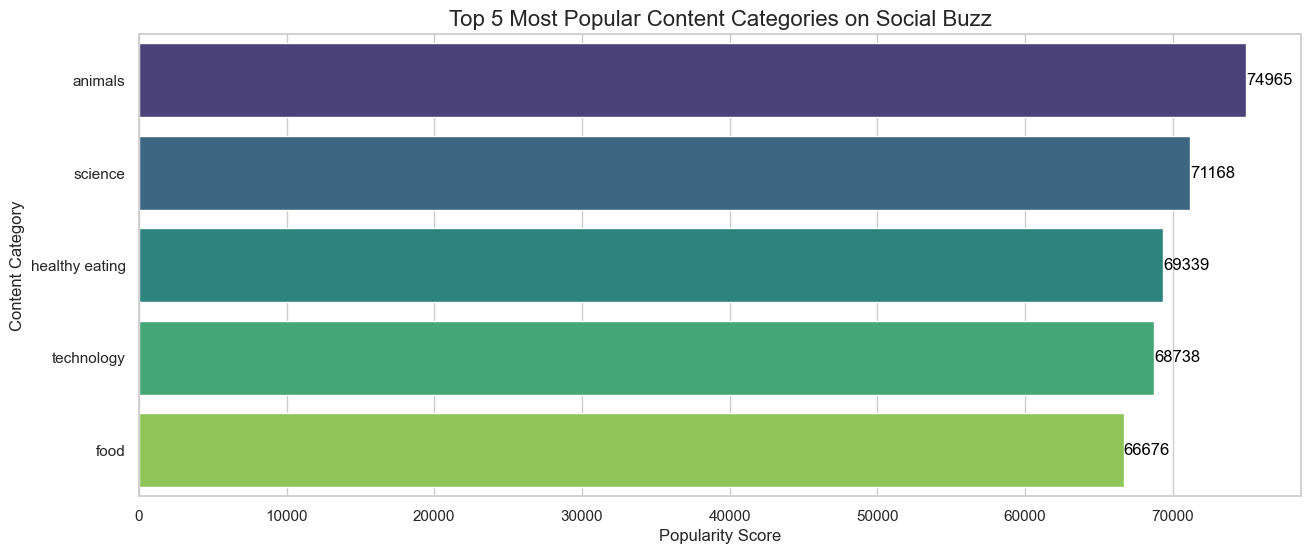

In [129]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,6))
barplot = sns.barplot(x='Score',y='Category',data=Top5_category_values,palette='viridis')
barplot.set_title('Top 5 Most Popular Content Categories on Social Buzz',fontsize=16)
barplot.set_xlabel('Popularity Score',fontsize=12)
barplot.set_ylabel('Content Category',fontsize=12)

for i,val in enumerate(Top5_category_values['Score']):
    barplot.text(val,i,f'{val}',color='black',ha='left',va='center')
plt.savefig('Popular_content.png', bbox_inches='tight')
plt.show()

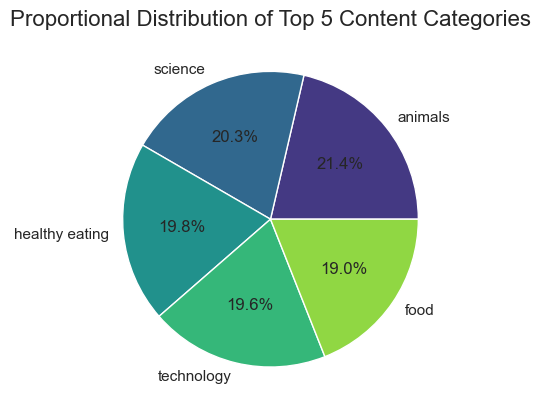

In [104]:
plt.figure()
plt.pie(Top5_category_values['Score'],labels=Top5_category_values['Category'],autopct='%1.1f%%',colors=sns.color_palette('viridis', len(Top5_category_values)))
plt.title("Proportional Distribution of Top 5 Content Categories", fontsize=16)
plt.savefig('Popular_content_pie.png', bbox_inches='tight')
plt.show()

In [105]:
final_data['Category'].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

In [106]:
final_data.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score,Months,years,Months_name
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-07-11 09:43:00,photo,studying,negative,0,7,2020,Jul
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:00,photo,studying,negative,10,6,2021,Jun
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:00,photo,studying,negative,15,4,2021,Apr
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-06-01 19:13:00,photo,studying,negative,0,6,2021,Jun
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:00,photo,studying,positive,30,8,2020,Aug


In [107]:
#How many unique categories are there?
final_data['Category'].value_counts()

animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: Category, dtype: int64

In [108]:
final_data['Reaction Type'].value_counts()

heart          1622
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: Reaction Type, dtype: int64

In [109]:
Category_unique_values = pd.DataFrame(
    final_data['Category'].value_counts().reset_index()
)
Category_unique_values.rename(columns={'index':'Category','Category':'Count'},inplace=True)
Category_unique_values

,Category,Count
0,animals,1897
1,science,1796
2,healthy eating,1717
3,food,1699
4,technology,1698
5,culture,1676
6,cooking,1664
7,travel,1647
8,soccer,1457
9,education,1433


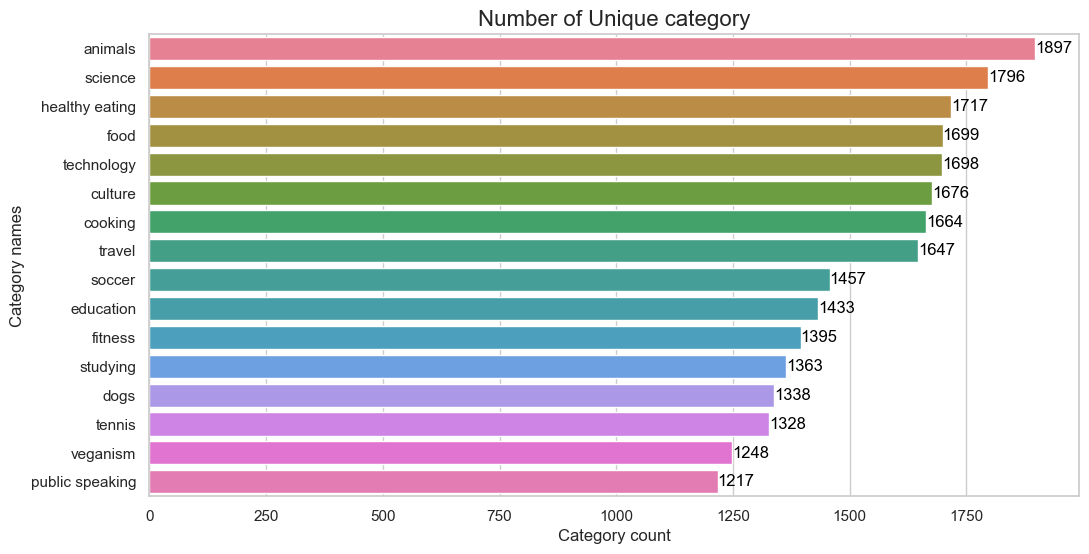

In [110]:
plt.figure(figsize=(12,6))
barplot = sns.barplot(x='Count',y='Category',data=Category_unique_values,hue='Category',legend=False)
barplot.set_title('Number of Unique category',fontsize=16)
barplot.set_xlabel('Category count',fontsize=12)
barplot.set_ylabel('Category names',fontsize=12)

for i,val in enumerate(Category_unique_values['Count']):
    barplot.text(val,i,f'{val}',color='black',ha='left',va='center')
plt.savefig('unique_categories.png',bbox_inches='tight')
plt.show()

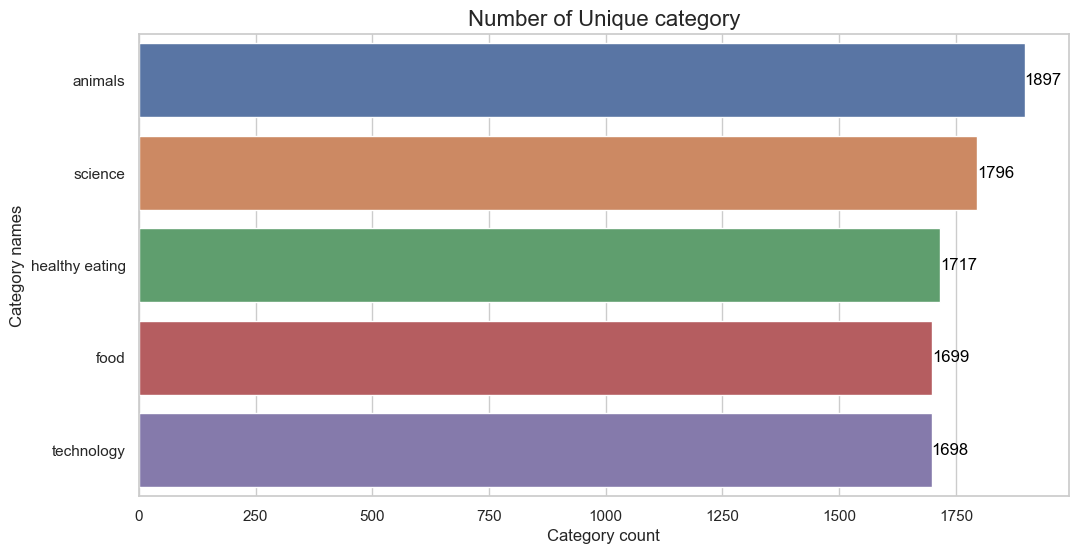

In [111]:
Top5_category = Category_unique_values.head(5)

plt.figure(figsize=(12,6))
barplot = sns.barplot(x='Count',y='Category',data=Top5_category,hue='Category',legend=False)
barplot.set_title('Number of Unique category',fontsize=16)
barplot.set_xlabel('Category count',fontsize=12)
barplot.set_ylabel('Category names',fontsize=12)

for i,val in enumerate(Top5_category['Count']):
    barplot.text(val,i,f'{val}',color='black',ha='left',va='center')
plt.savefig('Top5_category.png',bbox_inches='tight')
plt.show()

In [112]:
final_data['Reaction Type'].value_counts()

heart          1622
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: Reaction Type, dtype: int64

In [113]:
Top5_category

,Category,Count
0,animals,1897
1,science,1796
2,healthy eating,1717
3,food,1699
4,technology,1698


In [114]:
final_data.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score,Months,years,Months_name
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-07-11 09:43:00,photo,studying,negative,0,7,2020,Jul
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:00,photo,studying,negative,10,6,2021,Jun
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:00,photo,studying,negative,15,4,2021,Apr
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-06-01 19:13:00,photo,studying,negative,0,6,2021,Jun
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:00,photo,studying,positive,30,8,2020,Aug


In [115]:
Top5_data = Top5_category.merge(final_data.iloc[:,:],on='Category')
Top5_data.head()

,Category,Count,Content ID,Reaction Type,Datetime,Content Type,Sentiment,Score,Months,years,Months_name
0,animals,1897,07f88a73-aef2-45fd-8b5d-418e448b853d,cherish,2021-12-03 16:22:00,GIF,positive,70,12,2021,Dec
1,animals,1897,07f88a73-aef2-45fd-8b5d-418e448b853d,intrigued,2020-10-17 10:20:00,GIF,positive,45,10,2020,Oct
2,animals,1897,07f88a73-aef2-45fd-8b5d-418e448b853d,like,2020-12-19 16:42:00,GIF,positive,50,12,2020,Dec
3,animals,1897,07f88a73-aef2-45fd-8b5d-418e448b853d,love,2021-05-31 05:46:00,GIF,positive,65,5,2021,May
4,animals,1897,07f88a73-aef2-45fd-8b5d-418e448b853d,hate,2020-12-27 03:37:00,GIF,negative,5,12,2020,Dec


In [116]:
Top5_data['Reaction Type'].value_counts()

hate           593
want           582
adore          576
peeking        576
heart          570
cherish        566
love           560
interested     558
disgust        556
worried        537
super love     533
dislike        530
indifferent    525
scared         523
intrigued      515
like           507
Name: Reaction Type, dtype: int64

In [117]:
Top_CR = pd.DataFrame(Top5_data.groupby(['Category','Reaction Type'])['Score'].sum())
Top_CR = Top_CR.reset_index()
Top_CR

,Category,Reaction Type,Score
0,animals,adore,8208
1,animals,cherish,8750
2,animals,disgust,0
3,animals,dislike,1150
4,animals,hate,640
...,...,...,...
75,technology,peeking,4060
76,technology,scared,1320
77,technology,super love,8475
78,technology,want,7910


In [118]:
Top_CR['Category'].unique()

array(['animals', 'food', 'healthy eating', 'science', 'technology'],
      dtype=object)

In [119]:
Top_CR[Top_CR['Category'] == 'animals'].sort_values(by='Score',ascending=False)

,Category,Reaction Type,Score
13,animals,super love,9225
1,animals,cherish,8750
14,animals,want,8540
0,animals,adore,8208
10,animals,love,7735
5,animals,heart,7200
8,animals,intrigued,5220
9,animals,like,5050
11,animals,peeking,4515
7,animals,interested,3300


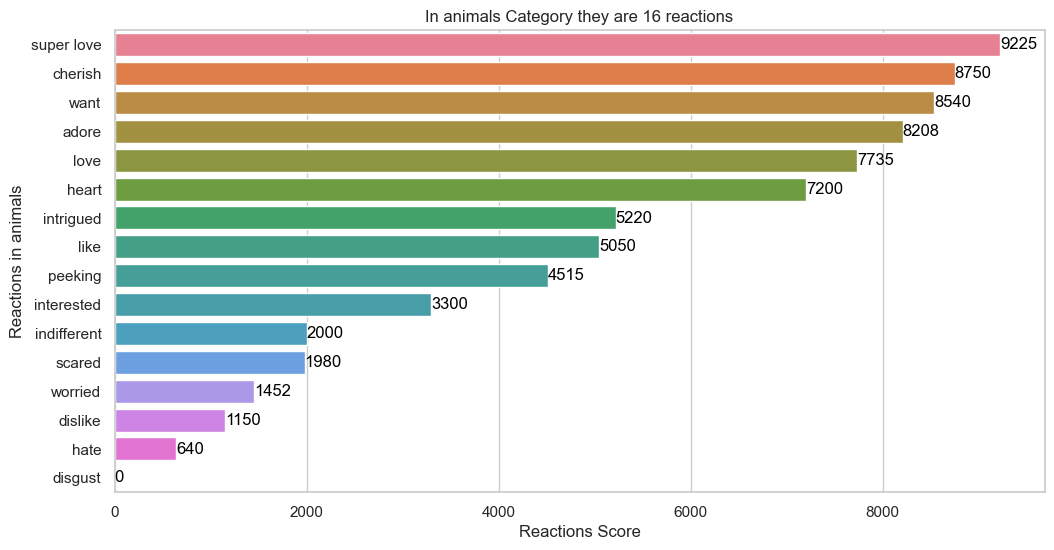

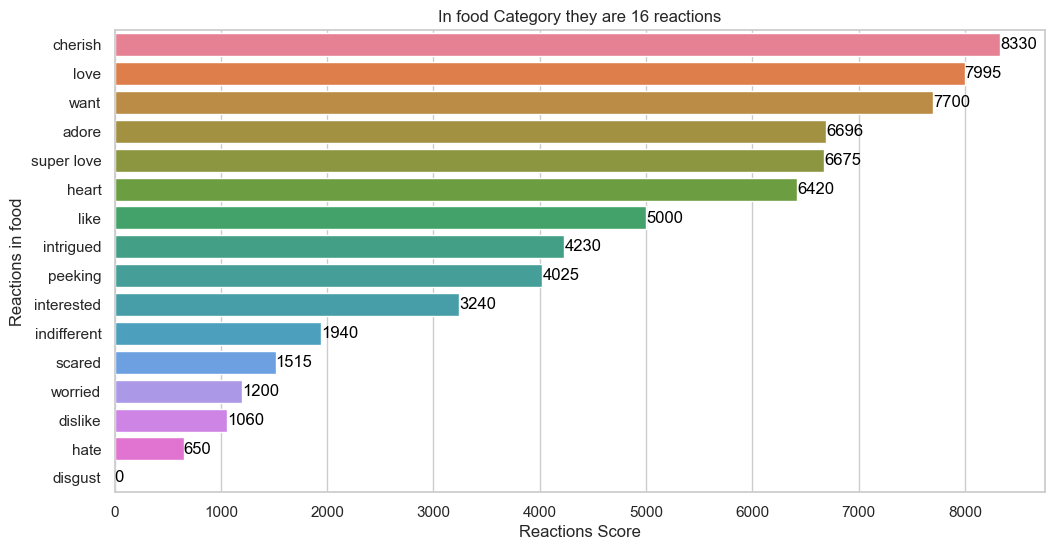

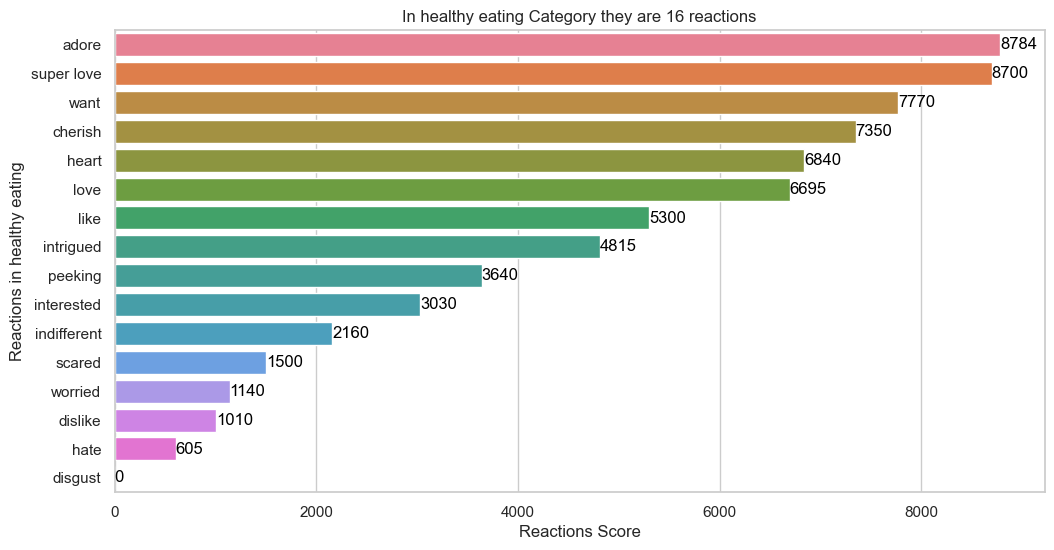

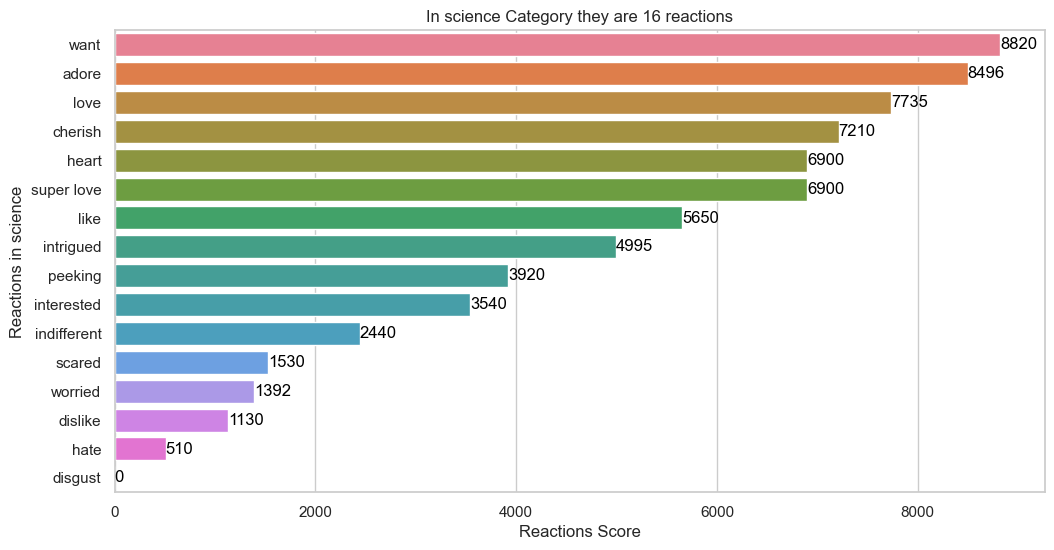

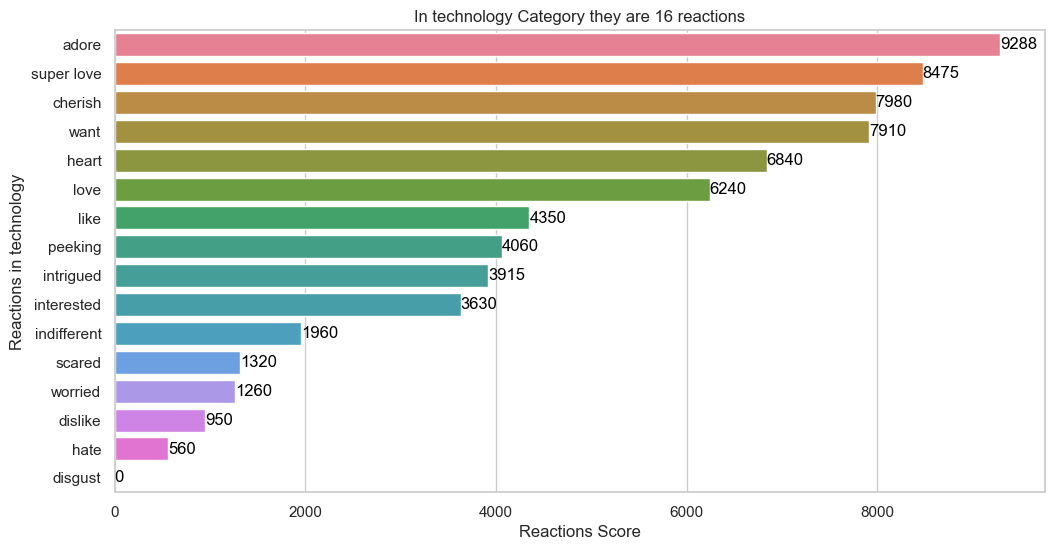

In [120]:
unique_categories = Top_CR['Category'].unique()
for val in unique_categories:
    temp = Top_CR[Top_CR['Category'] == val].sort_values(by='Score',ascending=False)
    plt.figure(figsize=(12,6))
    barplot = sns.barplot(x='Score',y='Reaction Type',data=temp,hue='Reaction Type')
    barplot.set_title(f'In {val} Category they are {len(temp)} reactions')
    barplot.set_xlabel('Reactions Score')
    barplot.set_ylabel(f'Reactions in {val}')
    for i,val in enumerate(temp['Score']):
        barplot.text(val,i,f'{val}',color='black',ha='left',va='center')
    plt.savefig(f'Reactions_{val}.png',bbox_inches='tight')
    plt.show()

In [121]:
#What was the month with the most posts?
final_data.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score,Months,years,Months_name
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-07-11 09:43:00,photo,studying,negative,0,7,2020,Jul
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:00,photo,studying,negative,10,6,2021,Jun
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:00,photo,studying,negative,15,4,2021,Apr
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-06-01 19:13:00,photo,studying,negative,0,6,2021,Jun
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:00,photo,studying,positive,30,8,2020,Aug


In [122]:
monthly_posts = final_data.groupby('Months_name').size().reset_index(name='count')
monthly_posts

,Months_name,count
0,Apr,1978
1,Aug,2055
2,Dec,2099
3,Feb,1890
4,Jan,2142
5,Jul,2116
6,Jun,2068
7,Mar,1982
8,May,2110
9,Nov,2055


In [123]:
monthly_posts['Months_name'] = pd.Categorical(monthly_posts['Months_name'],categories=months.values(),ordered=True)
monthly_posts = monthly_posts.sort_values(by='Months_name')
# monthly_posts['Month_nums'] = months.keys()
monthly_posts

,Months_name,count
4,Jan,2142
3,Feb,1890
7,Mar,1982
0,Apr,1978
8,May,2110
6,Jun,2068
5,Jul,2116
1,Aug,2055
11,Sept,1991
10,Oct,2087


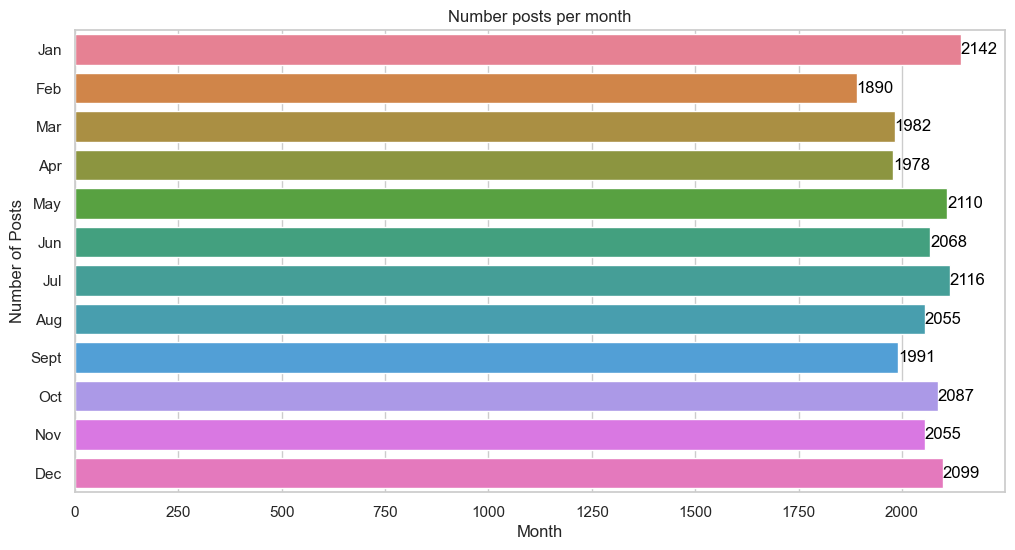

In [124]:
plt.figure(figsize=(12,6))
barplot = sns.barplot(x='count',y='Months_name',data=monthly_posts,hue='Months_name')
plt.title('Number posts per month')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
for i,val in enumerate(monthly_posts['count']):
    barplot.text(val,i,f'{val}',color='black',ha='left',va='center')
plt.savefig('posts_per_month.png', bbox_inches='tight')
plt.show()

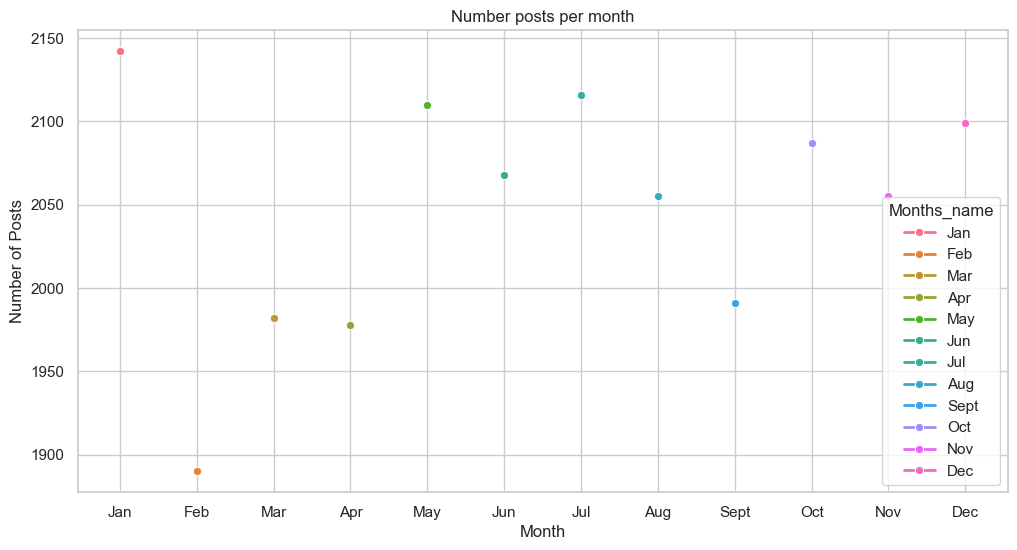

In [125]:
plt.figure(figsize=(12,6))
barplot = sns.lineplot(x='Months_name',y='count',data=monthly_posts,hue='Months_name',marker='o', color='b', linewidth=2)
plt.title('Number posts per month')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.show()

In [126]:
final_data['Reaction Type'].value_counts()

heart          1622
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: Reaction Type, dtype: int64

In [127]:
final_data['Category'].value_counts()

animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: Category, dtype: int64